In [64]:
import matplotlib.pyplot as plt
from keras import datasets, layers, models

In [65]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

CIFAR-10 stands for Canadian Institute For Advanced Research 10, which is a dataset of 50,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is commonly used for image classification tasks in machine learning and computer vision.

The 10 classes in the CIFAR-10 dataset are:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

In [66]:
X_train.shape

(50000, 32, 32, 3)

In [67]:
X_test.shape

(10000, 32, 32, 3)

In [68]:
y_train.shape

(50000, 1)

In [69]:
y_test.shape

(10000, 1)

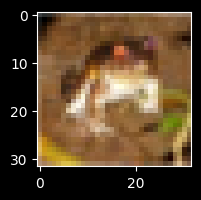

In [70]:
plt.figure(figsize=(15, 2))
plt.imshow(X_train[0])

In [71]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [72]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.xlabel(class_names[y_train[index][0]])

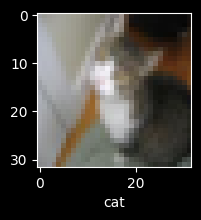

In [73]:
plot_sample(101)

In [74]:
# normalize

X_train = X_train / 255
X_test = X_test / 255

In [75]:
ann = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(3000, activation="relu"),
        layers.Dense(1000, activation="relu"),
        layers.Dense(10, activation="sigmoid"),
    ]
)

In [76]:
ann.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [77]:
ann.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


2023-07-30 23:49:21.129249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 39s 25ms/step - loss: 16.7788 - accuracy: 0.1571
Epoch 2/5
1563/1563 [==============================] - 38s 24ms/step - loss: 15.7826 - accuracy: 0.1745
Epoch 3/5
1563/1563 [==============================] - 37s 24ms/step - loss: 16.9909 - accuracy: 0.1775
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 15.9458 - accuracy: 0.1822
Epoch 5/5
1563/1563 [==============================] - 37s 24ms/step - loss: 15.6087 - accuracy: 0.1877


In [78]:
ann.evaluate(X_test, y_test)

  7/313 [..............................] - ETA: 2s - loss: 30.7043 - accuracy: 0.1696  

2023-07-30 23:54:23.973989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step - loss: 30.6695 - accuracy: 0.1247


[30.669471740722656, 0.12470000237226486]

In [79]:
y_pred = ann.predict(X_test)

  1/313 [..............................] - ETA: 1:55

2023-07-30 23:56:49.439595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step


In [80]:
cnn = models.Sequential(
    [
        layers.Conv2D(
            filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [81]:
cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [82]:
cnn.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


2023-07-31 00:01:40.209150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 23s 13ms/step - loss: 1.5029 - accuracy: 0.4639
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2399 - accuracy: 0.5683
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2511 - accuracy: 0.5831
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4673 - accuracy: 0.5631
Epoch 5/5
1563/1563 [==============================] - 18s 12ms/step - loss: 2.1973 - accuracy: 0.5271


In [83]:
cnn.evaluate(X_test, y_test)

  7/313 [..............................] - ETA: 2s - loss: 2.4081 - accuracy: 0.5536  

2023-07-31 00:04:00.452510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 2.4432 - accuracy: 0.5226


[2.443159580230713, 0.522599995136261]